In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r"/NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
training_set = df.iloc[:, 1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(training_set)

In [ ]:
df1

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [ ]:
def create_dataset(dataset, time_step=1):
  X_arr, Y_arr = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    X_arr.append(a)
    Y_arr.append(dataset[i + time_step, 0])
  return np.array(X_arr), np.array(Y_arr)
time_step = 60
X_train, y_train = create_dataset(df1, time_step)
X_test, y_test = create_dataset(df1, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
m=Sequential()
m.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units = 50,return_sequences=True))
m.add(Dropout(0.2))
m.add(LSTM(units = 50))
m.add(Dropout(0.2))
m.add(Dense(1))
m.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
train_predict=m.predict(X_train)
test_predict=m.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

79.10459365554203

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

79.10459365554203

In [ ]:
predicted_price = m.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

array([[77.2853  ],
       [77.27932 ],
       [77.27514 ],
       ...,
       [80.07674 ],
       [80.077965],
       [80.0778  ]], dtype=float32)

In [ ]:
df3 = pd.read_csv(r"/NSE-TATAGLOBAL.csv")


training_set = df3.iloc[:, 1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

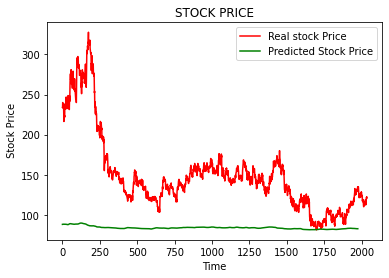

In [ ]:
import matplotlib.pyplot as plt
plt.plot(training_set, color = 'red', label = 'Real stock Price')
plt.plot(predicted_closing_price, color = 'green', label = 'Predicted Stock Price')
plt.title('STOCK PRICE')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()